# Neural Networks Continued

This notebook will attempt to train some Neural Networks on the Training data and save it for later use. It is an extension of 013 as I kept running into problems there

## Author: Alexander Goudemond, Student Number: 219030365

In this notebook, we are going to begin looking at training some neural networks.

I have tried to go through several U-net tutorials - all of which failed. I suspect there is a combination of problems affecting me:

- The tutorial data-sets are not clean or not accessible (hosted on private servers or websites, like Kaggle, Medium, PyImageSearch)

- The implementation is complicated and built on old dependencies

- there is too much data being brought in for training at one time, for offline use

- the offline training I have been trying to do is not possible, as my Graphics Card does not have enough VRAM

To try and overcome these challenges - I am going to load a single folder from our data-set into some training variables, and attempt to train a model on just those. I am unable to do an example tutorial - so I am hoping for the best with my implementation

# Mount Drive

We need to access some images loaded into Google Drive, so here we mount it

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please ensure the following folders exist

drive > MyDrive > COMP700_Images > COMP700_Training_GT

drive > MyDrive > COMP700_Images > COMP700_Training_ST

drive > MyDrive > COMP700_Neural_Network_Code

The latter location is where the Jupyter Notebooks will be loaded, and the former directories will contain the images used. These images are generated offline by the other notebooks and then uploaded to Google Drive

To try and fix the problems experienced in notebook 012, we will start by loading a larger dataset - all the GT images

# Imports

In [2]:
from os import getcwd, walk, mkdir, stat, remove
from os import sep # used later on, in a function, to print directory contents
from os.path import exists, basename, join

from shutil import copyfile

from PIL.Image import fromarray
import cv2

import matplotlib.pyplot as plt
import numpy as np

# Load images into variables

We will now look at 1 dataset from the ST folder, incase that has different results

In [3]:
getcwd()

'/content'

Let's start by looking at the quantity of images in this dataset

In [4]:
google_drive_path = "/drive/MyDrive"
training_data_folder = "COMP700_Training_ST"
training_data_directory = getcwd() + google_drive_path + "/COMP700_Images/" + training_data_folder
desired_directory = ""

data_root = ""

maxLength = -1
length = 0

# look for largest length
for root, dirs, files in walk(training_data_directory):
    if (len(files) != 0):
      length = len(files)

      if (maxLength < length):
        maxLength = length  
        data_root = root

print(maxLength, "at", data_root)

1764 at /content/drive/MyDrive/COMP700_Images/COMP700_Training_ST/BF-C2DL-HSC/BF-C2DL-HSC/01/X


remove the "x" at the end:

In [5]:
data_root = data_root[ : -2]

data_root

'/content/drive/MyDrive/COMP700_Images/COMP700_Training_ST/BF-C2DL-HSC/BF-C2DL-HSC/01'

In [6]:
x_paths = data_root + "/X"
y_paths = data_root + "/Y"

Now, we can use those paths to load the images in each directory into training variables:

In [7]:
x_image_paths = []

path = x_paths
for root, dirs, files in walk(path):
    # print(files)
    for image in files:
        x_image_paths.append( path + "/" + image )


In [8]:
y_image_paths = []

path = y_paths
for root, dirs, files in walk(path):
    # print(files)
    for image in files:
        y_image_paths.append( path + "/" + image )


In [9]:
print(len(x_image_paths), "images in both folders:", end="")

len(x_image_paths) == len(y_image_paths)

1764 images in both folders:

True

Let's confirm that the images correspond:

In [10]:
def extractRHS(string, symbol):
    index = string.rfind(symbol)
    # print(index)
    return string[ index + 1 : ]
###

extractRHS("219030365@stu.ukzn.zc.za", "@")

'stu.ukzn.zc.za'

In [11]:
from random import randint

for i in range(5):
    index = randint(0, len(x_image_paths)-1)

    print("Index:", index, ":", extractRHS(x_image_paths[index], "/"), 
          "and", extractRHS(y_image_paths[index], "/") )

Index: 129 : processed1_t0723.tif and man_seg1215.tif
Index: 682 : processed1_t1403.tif and man_seg1655.tif
Index: 180 : processed1_t0613.tif and man_seg0940.tif
Index: 1416 : processed1_t0501.tif and man_seg0312.tif
Index: 1095 : processed1_t0049.tif and man_seg0089.tif


They dont match! Perhaps Drive uses some kind of hashing function to store their files... Let us sort the lists:

In [12]:
x_image_paths.sort()
y_image_paths.sort()

In [13]:
from random import randint

for i in range(5):
    index = randint(0, len(x_image_paths)-1)

    print("Index:", index, ":", extractRHS(x_image_paths[index], "/"), 
          "and", extractRHS(y_image_paths[index], "/") )

Index: 290 : processed1_t0290.tif and man_seg0290.tif
Index: 28 : processed1_t0028.tif and man_seg0028.tif
Index: 1310 : processed1_t1310.tif and man_seg1310.tif
Index: 1537 : processed1_t1537.tif and man_seg1537.tif
Index: 1085 : processed1_t1085.tif and man_seg1085.tif


Now, next step is to load each image into an array:

In [102]:
x_images = []
length = len(x_image_paths)
count = 0
dim = (128, 128)

for item in x_image_paths:
    img = np.array( cv2.imread(item) )
    resized_img = cv2.resize(img, dim)
    x_images.append( resized_img )

    count += 1
    if (count % 50 == 0) and (count != 0):
        print(count, "images processed out of", length)

50 images processed out of 1764
100 images processed out of 1764
150 images processed out of 1764
200 images processed out of 1764
250 images processed out of 1764
300 images processed out of 1764
350 images processed out of 1764
400 images processed out of 1764
450 images processed out of 1764
500 images processed out of 1764
550 images processed out of 1764
600 images processed out of 1764
650 images processed out of 1764
700 images processed out of 1764
750 images processed out of 1764
800 images processed out of 1764
850 images processed out of 1764
900 images processed out of 1764
950 images processed out of 1764
1000 images processed out of 1764
1050 images processed out of 1764
1100 images processed out of 1764
1150 images processed out of 1764
1200 images processed out of 1764
1250 images processed out of 1764
1300 images processed out of 1764
1350 images processed out of 1764
1400 images processed out of 1764
1450 images processed out of 1764
1500 images processed out of 1764


In [103]:
y_images = []
length = len(y_image_paths)
count = 0
dim = (128, 128)

for item in y_image_paths:
    # Read as gray for NN
    # img = np.array( cv2.imread(item, cv2.IMREAD_GRAYSCALE) )

    # Read as colour for NN
    img = np.array( cv2.imread(item) )

    resized_img = cv2.resize(img, dim)
    y_images.append( resized_img )

    count += 1
    if (count % 50 == 0) and (count != 0):
        print(count, "images processed out of", length)

50 images processed out of 1764
100 images processed out of 1764
150 images processed out of 1764
200 images processed out of 1764
250 images processed out of 1764
300 images processed out of 1764
350 images processed out of 1764
400 images processed out of 1764
450 images processed out of 1764
500 images processed out of 1764
550 images processed out of 1764
600 images processed out of 1764
650 images processed out of 1764
700 images processed out of 1764
750 images processed out of 1764
800 images processed out of 1764
850 images processed out of 1764
900 images processed out of 1764
950 images processed out of 1764
1000 images processed out of 1764
1050 images processed out of 1764
1100 images processed out of 1764
1150 images processed out of 1764
1200 images processed out of 1764
1250 images processed out of 1764
1300 images processed out of 1764
1350 images processed out of 1764
1400 images processed out of 1764
1450 images processed out of 1764
1500 images processed out of 1764


In [104]:
len(x_images) == len(y_images)

True

Now that our information corresponds, let us shuffle and split the data:

In [105]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_images, y_images, test_size=0.2, random_state=4) # shuffles and partitions data

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Shape: (128, 128, 3)
Shape: (128, 128, 3)
Shape: (128, 128, 3)


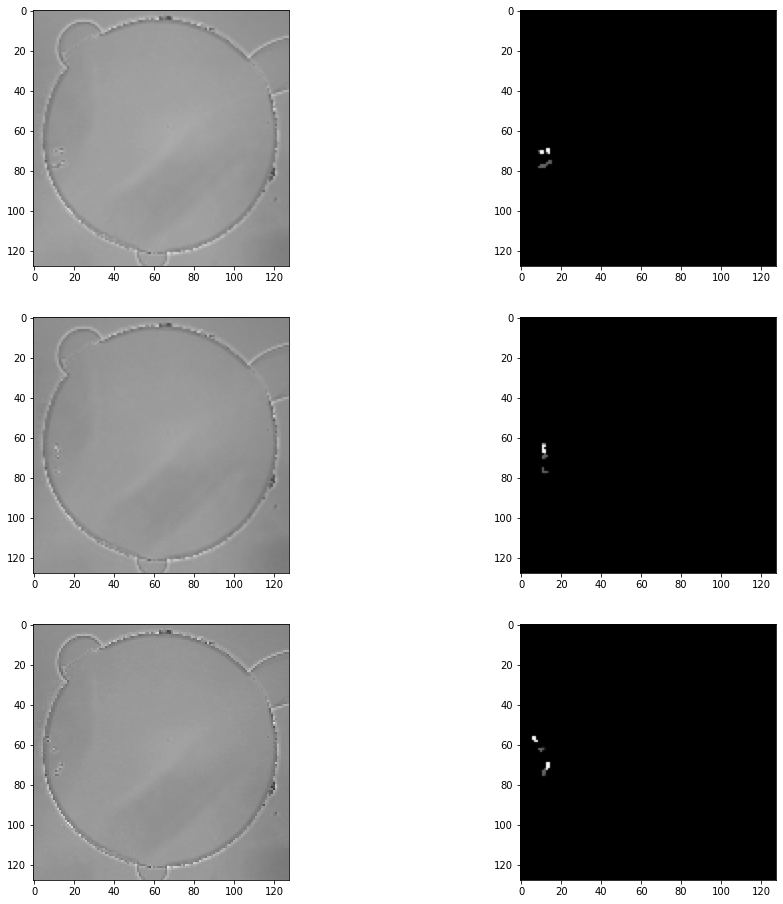

In [106]:
# Let's now try show these images side by side to verify results:

from random import randint

fig = plt.figure(figsize=(16, 16))

for i in range(0, 3):
    index = randint(0, len(x_train) - 1)
    print("Shape:", x_train[index].shape)

    plt.subplot(3, 2, i * 2 + 1)
    plt.imshow(x_train[index])

    plt.subplot(3, 2, i * 2 + 2)
    plt.imshow(y_train[index], cmap="gray")

plt.show()

Let's see if the UNet we tried in the previous notebook works now:

In [20]:
!pip install git+https://github.com/tensorflow/examples.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-8_aa1ecz
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-8_aa1ecz
  Created wheel for tensorflow-examples: filename=tensorflow_examples-9eb657f949c2e8ec8592a9576811db38a86dcbc0_-py3-none-any.whl size=299703 sha256=0011c59f6f807bdada6738b2a4910e8df0b140d899986f88a64d4fd4015950d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ois88zo/wheels/eb/19/50/2a4363c831fa12b400af86325a6f26ade5d2cdc5b406d552ca
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/i

In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [22]:
from tensorflow_examples.models.pix2pix import pix2pix

from IPython.display import clear_output
import matplotlib.pyplot as plt


from tensorflow import keras

from keras.layers import Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, concatenate, Input, Lambda

In [23]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False


9406464/9406464 [==============================] - 0s 0us/step


In [24]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]


In [25]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)


Note that the number of filters on the last layer is set to the number of output_channels. This will be one output channel per class.

## Train the model

Now, all that is left to do is to compile and train the model.

Since this is a multiclass classification problem, use the tf.keras.losses.CategoricalCrossentropy loss function with the from_logits argument set to True, since the labels are scalar integers instead of vectors of scores for each pixel of every class.

When running inference, the label assigned to the pixel is the channel with the highest value. This is what the create_mask function is doing.

In [ ]:
sample_image, sample_mask = x_train[0], y_train[0]

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]


In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()


In [ ]:
def show_predictions(model, dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(tensorflow_model.predict(sample_image[tf.newaxis, ...]))])


In [ ]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model = unet_model(output_channels=OUTPUT_CLASSES)

# RMSprop compiler
tensorflow_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

1/1 [==============================] - 0s 20ms/step


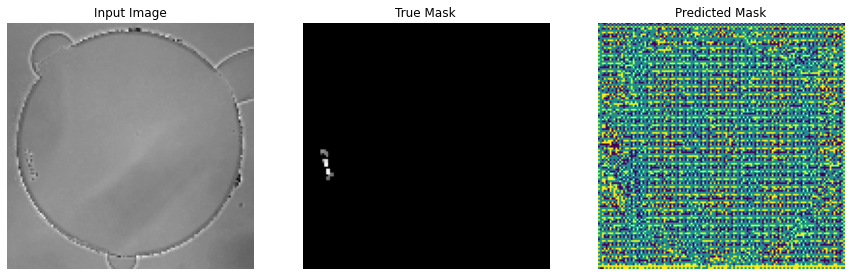

In [ ]:
# predict before training to see what happens
show_predictions(tensorflow_model)

In [ ]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions(tensorflow_model)
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))


1/1 [==============================] - 0s 21ms/step


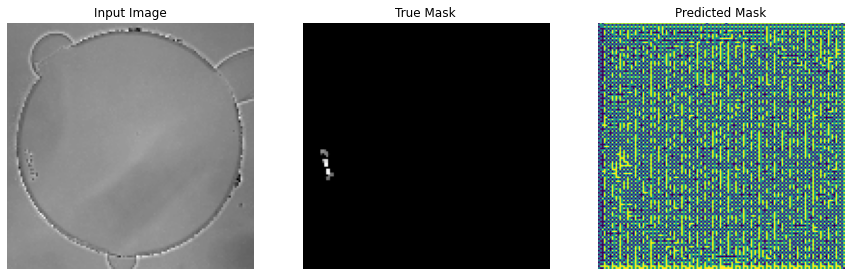


Sample Prediction after epoch 14

705/705 [==============================] - 5s 7ms/step - loss: 0.9679 - accuracy: 0.3301


In [ ]:


# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 2
VAL_SUBSPLITS = 5

EPOCHS = 20
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH #// VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_history = tensorflow_model.fit(
                                                x_train,
                                                y_train, 
                                                epochs=EPOCHS,
                                                steps_per_epoch=STEPS_PER_EPOCH,
                                                callbacks=[DisplayCallback()],
                                                validation_steps=VALIDATION_STEPS,
                                                validation_data=(x_test, y_test)
                                                )




After doing some reading on this, one suggestion is to ensure the classes in the mask are consistent, and few. So let's investigate how many unique pixels are in our masks:

In [ ]:
all_unique_pixels = []

for image in y_train:
  unique_pixels = np.unique(image)
  # print(unique_pixels)

  for pixel in unique_pixels:
    if (pixel not in all_unique_pixels):
      all_unique_pixels.append( pixel )


all_unique_pixels.sort()
print(all_unique_pixels)

print(len(all_unique_pixels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

Okay! Our resized images have any of the possible 256 intensity values in the Image Masks. Let's compare the original, unsized pictures, and see if this is different:

In [ ]:
all_unique_pixels_og = []

len(y_image_paths)

for path in y_image_paths:
  img = cv2.imread( path )

  unique_pixels = np.unique(img)
  # print(unique_pixels)

  for pixel in unique_pixels:
    if (pixel not in all_unique_pixels_og):
      all_unique_pixels_og.append( pixel )

all_unique_pixels_og.sort()
print(all_unique_pixels_og)

print(len(all_unique_pixels_og))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 52, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,

Frustratingly, our original masks also contain most of the 256 possible intensity values

Okay! Here is what we are going to do. I am going to partition our image into 5 buckets of 51 pixels. In other words:

- class 0: 0 - 50

- class 1: 51 - 101

- class 2: 102 - 152

- class 3: 153 - 204

- class 4: 204 - 255

Any pixel that is underneath that threshold is updated to the class. Let's try this with 1 image and see if we notice anything:

In [ ]:
# we will do a binary addition here

def constrictMaskClasses(img):
  (x, y, z) = img.shape
  new_img = np.array( [[[0 for i in range(z)] for j in range(y)] for k in range(x)] )

  new_img[ img < 256] = 4 # class 4
  new_img[ img < 204] = 3 # class 3
  new_img[ img < 153] = 2 # class 2
  new_img[ img < 102] = 1 # class 1
  new_img[ img < 51]  = 0  # class 0 - subtract

  return new_img
###

# should correspond to [ [0, 0, 1] , [2, 0, 3] , [3, 4, 4] ] * 3
test_array = np.array( [[[1, 50, 100], [103, 14, 153], [202, 204, 255]], [[1, 50, 100], [103, 14, 153], [202, 204, 255]], [[1, 50, 100], [103, 14, 153], [202, 204, 255]]] )
print(constrictMaskClasses(test_array))

[[[0 0 1]
  [2 0 3]
  [3 4 4]]

 [[0 0 1]
  [2 0 3]
  [3 4 4]]

 [[0 0 1]
  [2 0 3]
  [3 4 4]]]


great! we can now multiply the result by 51 to scale the values appropriately

Shape: (128, 128, 3)


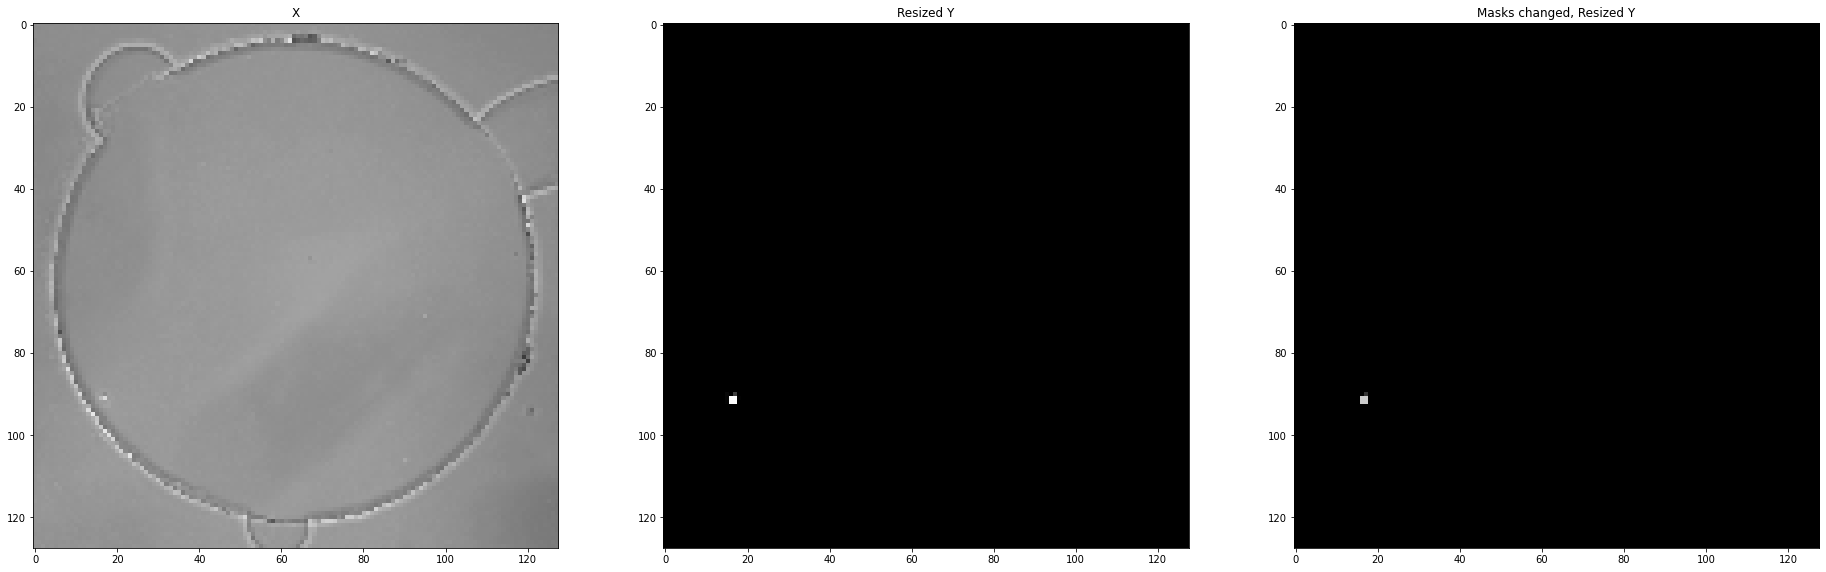

In [ ]:
# Let's now try show these images side by side to verify results:

from random import randint

fig = plt.figure(figsize=(32, 32))

index = randint(0, len(x_train) - 1)
print("Shape:", x_train[index].shape)

plt.subplot(1, 3, 1)
plt.imshow(x_train[index])
plt.title("X")

plt.subplot(1, 3, 2)
plt.imshow(y_train[index], cmap="gray")
plt.title("Resized Y")

plt.subplot(1, 3, 3)
adjusted_mask = np.array( constrictMaskClasses( y_train[index] ) * 51 )
plt.imshow(adjusted_mask, cmap="gray")
plt.title("Masks changed, Resized Y")

plt.show()

That appears to be stable... Let us now create new variables to hold those values:

In [ ]:
y_train_new_masks = []
length = len(y_train)
count = 0

for image in y_train:
  y_train_new_masks.append( constrictMaskClasses( image ) * 51 )

  count += 1
  if (count % 50 == 0) and (count != 0):
      print(count, "images processed out of", length)



50 images processed out of 1411
100 images processed out of 1411
150 images processed out of 1411
200 images processed out of 1411
250 images processed out of 1411
300 images processed out of 1411
350 images processed out of 1411
400 images processed out of 1411
450 images processed out of 1411
500 images processed out of 1411
550 images processed out of 1411
600 images processed out of 1411
650 images processed out of 1411
700 images processed out of 1411
750 images processed out of 1411
800 images processed out of 1411
850 images processed out of 1411
900 images processed out of 1411
950 images processed out of 1411
1000 images processed out of 1411
1050 images processed out of 1411
1100 images processed out of 1411
1150 images processed out of 1411
1200 images processed out of 1411
1250 images processed out of 1411
1300 images processed out of 1411
1350 images processed out of 1411
1400 images processed out of 1411


In [ ]:
len(x_train) == len(y_train_new_masks)

True

In [ ]:
y_test_new_masks = []
length = len(y_test)
count = 0

for image in y_test:
  y_test_new_masks.append( constrictMaskClasses( image ) * 51 )

  count += 1
  if (count % 50 == 0) and (count != 0):
      print(count, "images processed out of", length)



50 images processed out of 353
100 images processed out of 353
150 images processed out of 353
200 images processed out of 353
250 images processed out of 353
300 images processed out of 353
350 images processed out of 353


In [ ]:
len(y_test) == len(y_test_new_masks)

True

In [ ]:
# don't forget to make numpy arrays

y_train_new_masks = np.array( y_train_new_masks )
y_test_new_masks = np.array( y_test_new_masks )

In [ ]:
print(x_train.shape)
print(y_train_new_masks.shape)
print(y_test.shape)
print(y_test_new_masks.shape)

(1411, 128, 128, 3)
(1411, 128, 128, 3)
(353, 128, 128, 3)
(353, 128, 128, 3)


Let's now try the model again...

In [ ]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model_2 = unet_model(output_channels=OUTPUT_CLASSES)

# RMSprop compiler
tensorflow_model_2.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

1/1 [==============================] - 0s 42ms/step


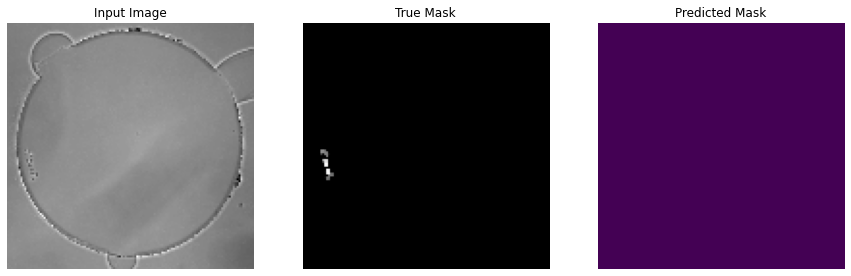


Sample Prediction after epoch 4

705/705 [==============================] - 5s 7ms/step - loss: nan - accuracy: 1.0000


In [ ]:


# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 2
VAL_SUBSPLITS = 5

EPOCHS = 5
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH #// VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_2_history = tensorflow_model_2.fit(
                                                    x_train,
                                                    y_train_new_masks, 
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=STEPS_PER_EPOCH,
                                                    callbacks=[DisplayCallback()],
                                                    validation_steps=VALIDATION_STEPS,
                                                    validation_data=(x_test, y_test_new_masks)
                                                    )




Why does the loss begin with NaN?

In [ ]:
# Let's double check that our data contains no NaN values:
count = 0

for image in y_train_new_masks:
  if (np.any( np.isnan(image) )):
    count += 1

print(count, "value(s) of NaN in y_train_new_masks")

count = 0

for image in y_test_new_masks:
  if (np.any( np.isnan(image) )):
    count += 1

print(count, "value(s) of NaN in y_test_new_masks")

0 value(s) of NaN in y_train_new_masks
0 value(s) of NaN in y_test_new_masks


Try using binary crossentropy:

1/1 [==============================] - 0s 21ms/step


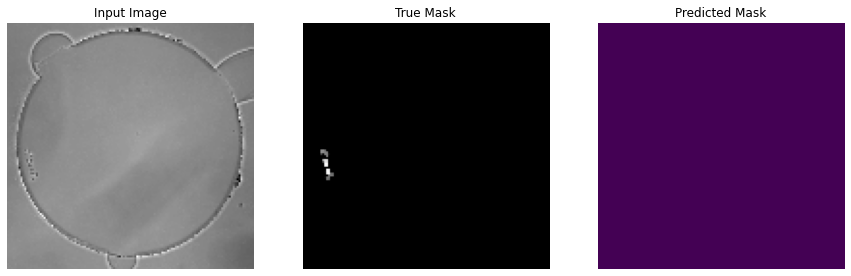


Sample Prediction after epoch 5

176/176 [==============================] - 3s 14ms/step - loss: nan - accuracy: 1.0000


In [ ]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model_3 = unet_model(output_channels=OUTPUT_CLASSES)

# RMSprop compiler
tensorflow_model_3.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])



# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 8
VAL_SUBSPLITS = 5

EPOCHS = 5
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH // VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_3_history = tensorflow_model_3.fit(
                                                    x_train,
                                                    y_train_new_masks, 
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=STEPS_PER_EPOCH,
                                                    callbacks=[DisplayCallback()],
                                                    validation_steps=VALIDATION_STEPS,
                                                    validation_data=(x_test, y_test_new_masks)
                                                    )




Oh gosh... The only other thing I can think of is creating the masks in a 2D image, and converting it to colour afterwards... Let us try that, and then investigate another technique (perhaps Patchify)

In [ ]:
# we will do a binary addition here

def constrictMaskClasses2D(img):
  (x, y) = img.shape
  new_img = np.array( [[0 for i in range(y)] for j in range(x)]  )

  new_img[ img < 256] = 4 # class 4
  new_img[ img < 204] = 3 # class 3
  new_img[ img < 153] = 2 # class 2
  new_img[ img < 102] = 1 # class 1
  new_img[ img < 51]  = 0  # class 0 - subtract

  return new_img
###

# should correspond to [ [0, 0, 1] , [2, 0, 3] , [3, 4, 4] ]
test_array = np.array( [[1, 50, 100], [103, 14, 153], [202, 204, 255]] )
print(constrictMaskClasses2D(test_array))

[[0 0 1]
 [2 0 3]
 [3 4 4]]


Shape: (128, 128, 3)


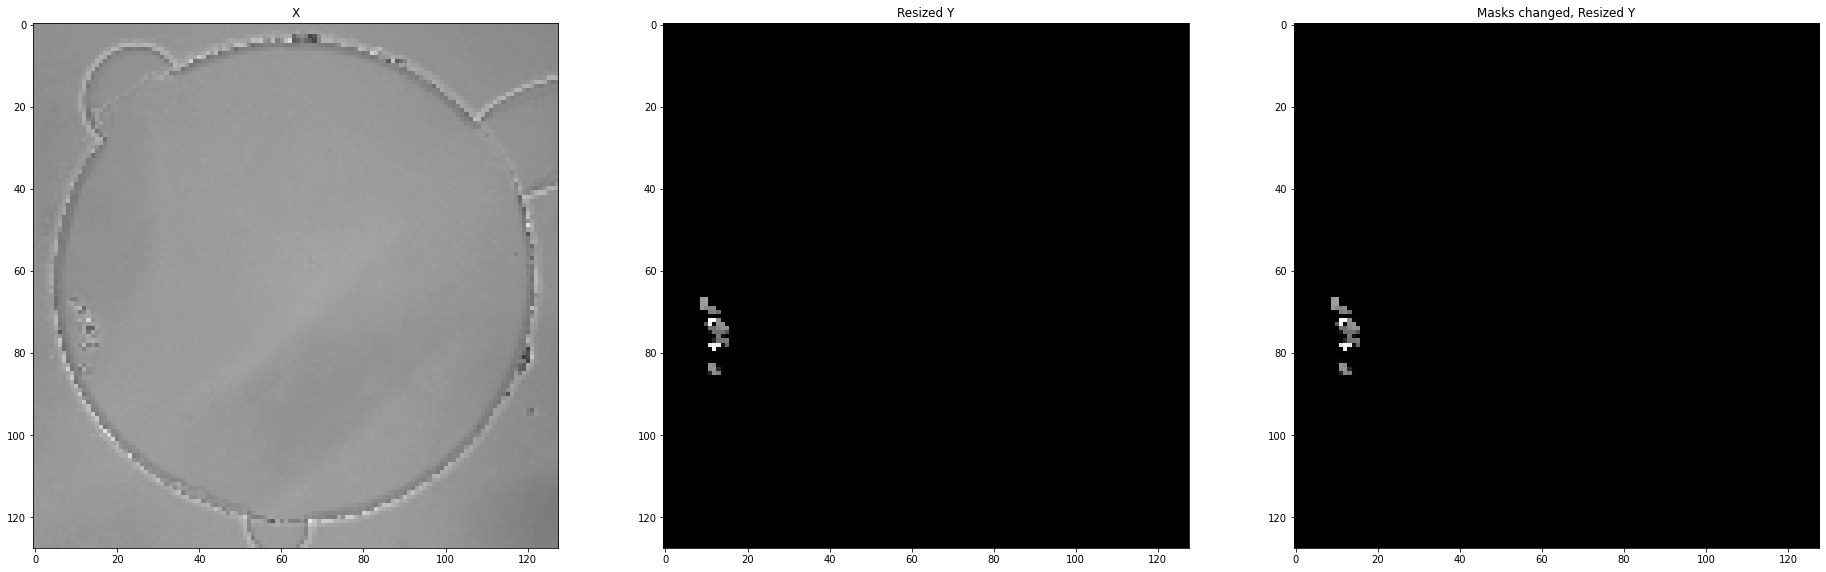

In [ ]:
# Let's now try show these images side by side to verify results:

from random import randint

fig = plt.figure(figsize=(32, 32))

index = randint(0, len(x_train) - 1)
print("Shape:", x_train[index].shape)

plt.subplot(1, 3, 1)
plt.imshow(x_train[index])
plt.title("X")

plt.subplot(1, 3, 2)
plt.imshow(y_train[index], cmap="gray")
plt.title("Resized Y")

plt.subplot(1, 3, 3)

gray = cv2.cvtColor( y_train[index], cv2.COLOR_BGR2GRAY)
adjusted_mask = np.array( constrictMaskClasses2D( gray ) * 51 )
colour = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

plt.imshow(colour, cmap="gray")
plt.title("Masks changed, Resized Y")

plt.show()

## Next - attempt to change the masks by converting to grayscale and back

In [ ]:
y_train_new_masks = []
length = len(y_train)
count = 0

for image in y_train:
  
  gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY)
  adjusted_mask = np.array( constrictMaskClasses2D( gray ) * 51 )
  colour = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

  y_train_new_masks.append( colour )

  count += 1
  if (count % 50 == 0) and (count != 0):
      print(count, "images processed out of", length)



50 images processed out of 1411
100 images processed out of 1411
150 images processed out of 1411
200 images processed out of 1411
250 images processed out of 1411
300 images processed out of 1411
350 images processed out of 1411
400 images processed out of 1411
450 images processed out of 1411
500 images processed out of 1411
550 images processed out of 1411
600 images processed out of 1411
650 images processed out of 1411
700 images processed out of 1411
750 images processed out of 1411
800 images processed out of 1411
850 images processed out of 1411
900 images processed out of 1411
950 images processed out of 1411
1000 images processed out of 1411
1050 images processed out of 1411
1100 images processed out of 1411
1150 images processed out of 1411
1200 images processed out of 1411
1250 images processed out of 1411
1300 images processed out of 1411
1350 images processed out of 1411
1400 images processed out of 1411


In [ ]:
len(x_train) == len(y_train_new_masks)

True

In [ ]:
y_test_new_masks = []
length = len(y_test)
count = 0

for image in y_test:

  gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY)
  adjusted_mask = np.array( constrictMaskClasses2D( gray ) * 51 )
  colour = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

  y_test_new_masks.append( colour )

  count += 1
  if (count % 50 == 0) and (count != 0):
      print(count, "images processed out of", length)



50 images processed out of 353
100 images processed out of 353
150 images processed out of 353
200 images processed out of 353
250 images processed out of 353
300 images processed out of 353
350 images processed out of 353


In [ ]:
len(y_test) == len(y_test_new_masks)

True

In [ ]:
# don't forget to make numpy arrays

y_train_new_masks = np.array( y_train_new_masks )
y_test_new_masks = np.array( y_test_new_masks )

In [ ]:
print(x_train.shape)
print(y_train_new_masks.shape)
print(y_test.shape)
print(y_test_new_masks.shape)

(1411, 128, 128, 3)
(1411, 128, 128, 3)
(353, 128, 128, 3)
(353, 128, 128, 3)


1/1 [==============================] - 0s 21ms/step


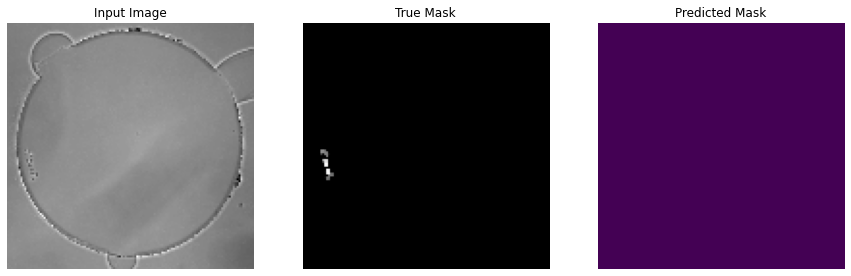


Sample Prediction after epoch 5

176/176 [==============================] - 3s 19ms/step - loss: nan - accuracy: 1.0000


In [ ]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model_4 = unet_model(output_channels=OUTPUT_CLASSES)

# RMSprop compiler
tensorflow_model_4.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])



# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 8
VAL_SUBSPLITS = 5

EPOCHS = 5
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH // VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_4_history = tensorflow_model_4.fit(
                                                    x_train,
                                                    y_train_new_masks, 
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=STEPS_PER_EPOCH,
                                                    callbacks=[DisplayCallback()],
                                                    validation_steps=VALIDATION_STEPS,
                                                    validation_data=(x_test, y_test_new_masks)
                                                    )




Last attempt with categorical cross entropy

1/1 [==============================] - 0s 20ms/step


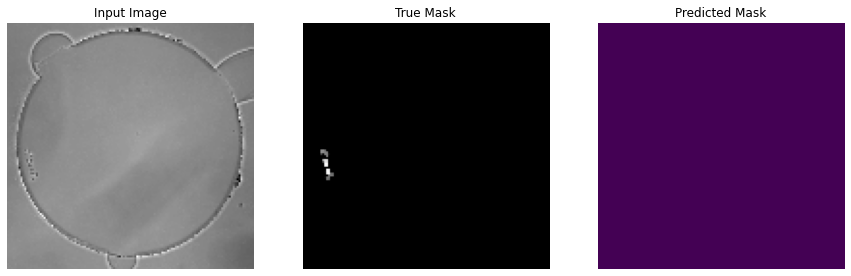


Sample Prediction after epoch 5

176/176 [==============================] - 2s 14ms/step - loss: nan - accuracy: 1.0000


In [ ]:

OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model_4 = unet_model(output_channels=OUTPUT_CLASSES)

# RMSprop compiler
tensorflow_model_4.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])



# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 8
VAL_SUBSPLITS = 5

EPOCHS = 5
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH // VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_4_history = tensorflow_model_4.fit(
                                                    x_train,
                                                    y_train_new_masks, 
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=STEPS_PER_EPOCH,
                                                    callbacks=[DisplayCallback()],
                                                    validation_steps=VALIDATION_STEPS,
                                                    validation_data=(x_test, y_test_new_masks)
                                                    )




Worth reading later and investigating:

https://discuss.tensorflow.org/t/getting-nan-for-loss/4826/3

https://github.com/HenriquesLab/ZeroCostDL4Mic/issues/55

# Final Mask Re-adjustment

Before we continue, let us confirm that the Oxford Animal Masks have a few number of classes

In [34]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteOCTSQ8/oxford_iiit_pet-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteOCTSQ8/oxford_iiit_pet-test.tfrecord*...:   0%…

Dataset oxford_iiit_pet downloaded and prepared to ~/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In addition, the image color values are normalized to the [0, 1] range. Finally, as mentioned above the pixels in the segmentation mask are labeled either {1, 2, 3}. For the sake of convenience, subtract 1 from the segmentation mask, resulting in labels that are : {0, 1, 2}.

In [35]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask


In [36]:
def load_image(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask


The dataset already contains the required training and test splits, so continue to use the same splits:

In [37]:
train_images = dataset['train'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_images = dataset['test'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)


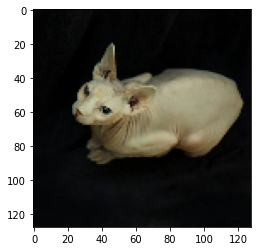

In [47]:
# fetch picture and show it
elem = next(iter(train_images))

plt.imshow(elem[0])

In [52]:
class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

  def call(self, inputs, labels):
    inputs = self.augment_inputs(inputs)
    labels = self.augment_labels(labels)
    return inputs, labels


In [53]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 8
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE


train_batches = (
    train_images
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

test_batches = test_images.batch(BATCH_SIZE)


In [54]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()


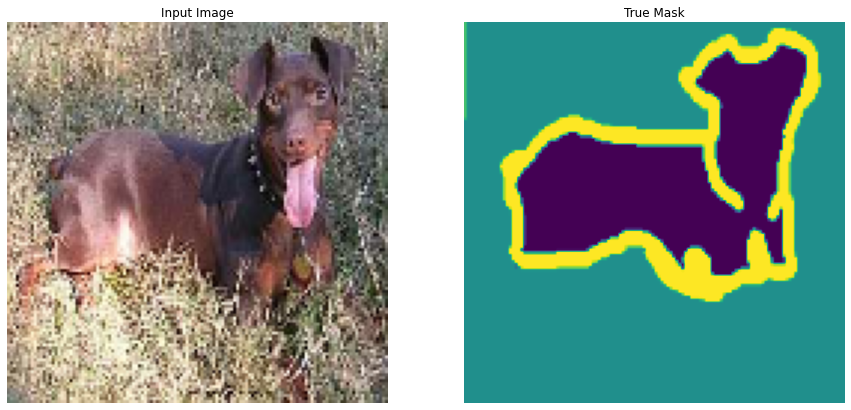

In [55]:
for images, masks in train_batches.take(1):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask])

Right! Let us now see how many unique elements we have:

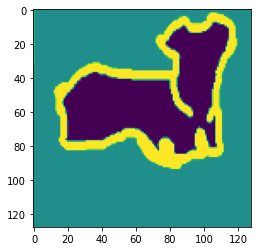

In [69]:
img = tf.keras.utils.array_to_img(sample_mask)

plt.imshow(img)

In [70]:
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  14,
        19,  21,  22,  23,  27,  30,  32,  34,  36,  37,  38,  41,  42,
        45,  47,  49,  51,  53,  54,  55,  56,  57,  59,  60,  61,  66,
        69,  70,  71,  72,  74,  75,  76,  80,  81,  82,  84,  85,  87,
        93,  94,  95,  99, 102, 103, 107, 110, 111, 115, 118, 119, 120,
       122, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138,
       139, 141, 142, 145, 146, 147, 148, 151, 152, 153, 154, 155, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 184, 187,
       188, 190, 191, 192, 194, 195, 196, 197, 199, 200, 201, 203, 205,
       206, 207, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 226, 227, 228, 229, 230, 231, 232, 233, 235, 237, 239, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255], dtype=uint8)

curiously - that appears to also have many classes... So I wonder why my images are failing?

The only other thing I can try to do is to set the Masks into 2 classes - 0 and 255. Let ys see if that helps...

In [112]:
# we will do a binary addition here

def createBinaryMask(img):
  (x, y, z) = img.shape
  new_img = np.array( [[[0 for i in range(z)] for j in range(y)] for k in range(x)] )

  new_img[ img > 0]  = 255

  return new_img
###

# should correspond to [ [0, 255, 0] , [255, 0, 255] , [255, 255, 0] ] * 3
test_array = np.array( [ [ [0, 1, 0], [1, 0, 240], [230, 135, 0] ], [ [0, 1, 0], [1, 0, 240], [230, 135, 0] ], [ [0, 1, 0], [1, 0, 240], [230, 135, 0] ] ] )
print(createBinaryMask(test_array))

[[[  0 255   0]
  [255   0 255]
  [255 255   0]]

 [[  0 255   0]
  [255   0 255]
  [255 255   0]]

 [[  0 255   0]
  [255   0 255]
  [255 255   0]]]


In [109]:
print(x_train.shape)
print(y_train.shape)

(1411, 128, 128, 3)
(1411, 128, 128, 3)


Shape: (128, 128, 3)


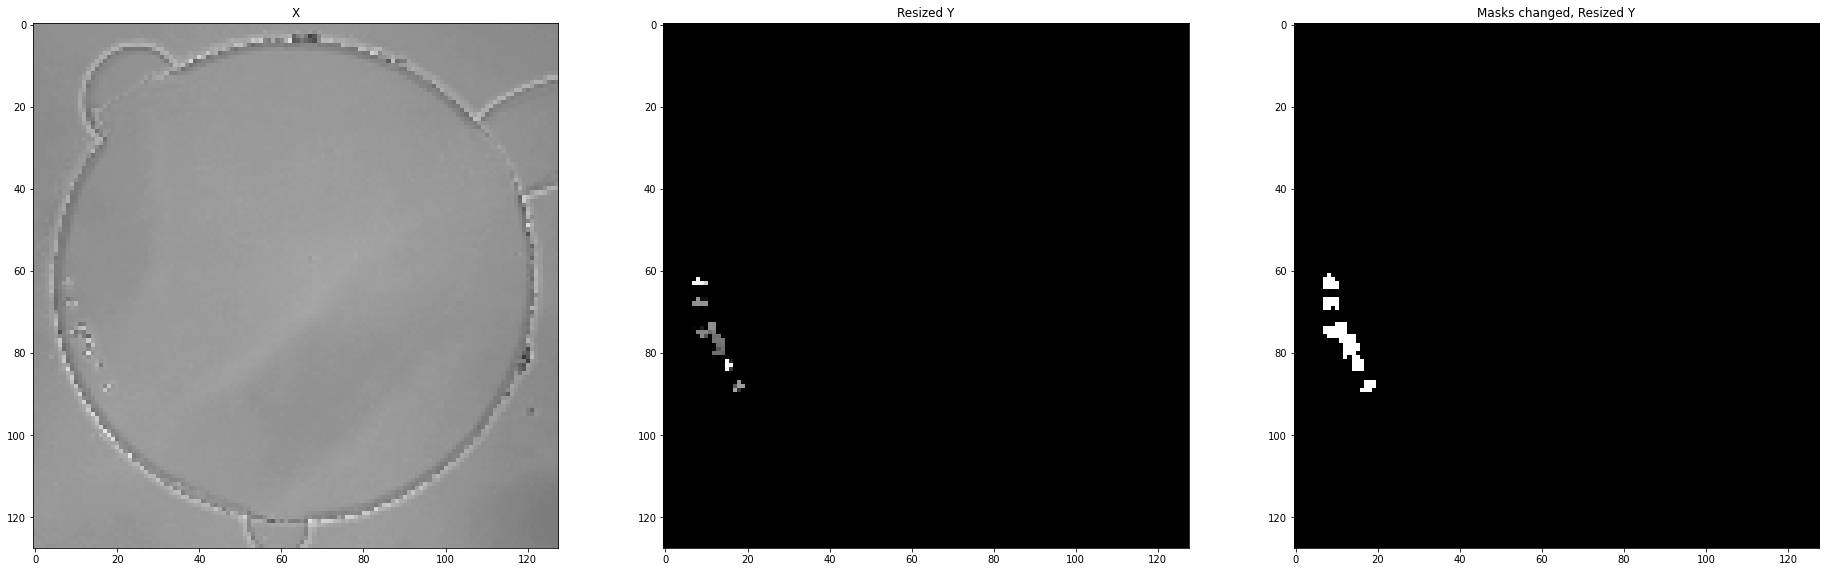

In [113]:
# Let's now try show these images side by side to verify results:

from random import randint

fig = plt.figure(figsize=(32, 32))

index = randint(0, len(x_train) - 1)
print("Shape:", x_train[index].shape)

plt.subplot(1, 3, 1)
plt.imshow(x_train[index])
plt.title("X")

plt.subplot(1, 3, 2)
plt.imshow(y_train[index], cmap="gray")
plt.title("Resized Y")

plt.subplot(1, 3, 3)
adjusted_mask = np.array( createBinaryMask( y_train[index] ) )
plt.imshow(adjusted_mask, cmap="gray")
plt.title("Masks changed, Resized Y")

plt.show()

Let's now try this with our NN

In [114]:
y_train_binary_masks = []

for image in y_train:
  y_train_binary_masks.append( createBinaryMask(image) )

y_train_binary_masks = np.array( y_train_binary_masks )

In [115]:
y_test_binary_masks = []

for image in y_test:
  y_test_binary_masks.append( createBinaryMask(image) )

y_test_binary_masks = np.array( y_test_binary_masks )

In [116]:
sample_image, sample_mask = x_train[0], y_train_binary_masks[0]

In [118]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]


In [119]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()


In [120]:
def show_predictions(model, dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(tensorflow_model.predict(sample_image[tf.newaxis, ...]))])


In [121]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model = unet_model(output_channels=OUTPUT_CLASSES)

# RMSprop compiler
tensorflow_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

1/1 [==============================] - 1s 767ms/step


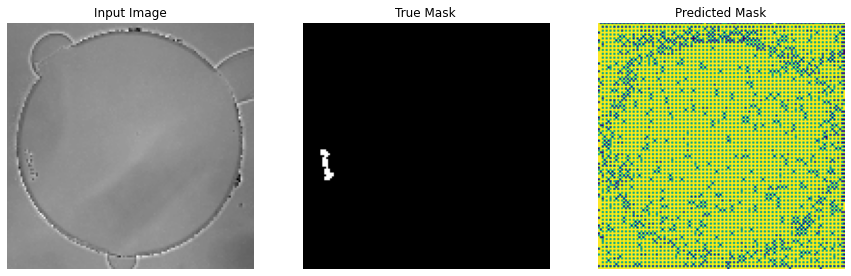

In [122]:
# predict before training to see what happens
show_predictions(tensorflow_model)

That suggestion actually looks like a pretty good start... Let's keep going!

In [123]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions(tensorflow_model)
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))


1/1 [==============================] - 0s 18ms/step


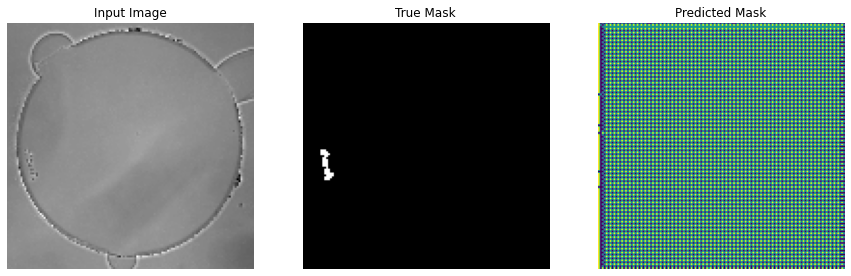


Sample Prediction after epoch 14

705/705 [==============================] - 4s 6ms/step - loss: 2.2606 - accuracy: 0.3662


In [124]:


# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 2
VAL_SUBSPLITS = 5

EPOCHS = 20
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH #// VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_history = tensorflow_model.fit(
                                                x_train,
                                                y_train_binary_masks, 
                                                epochs=EPOCHS,
                                                steps_per_epoch=STEPS_PER_EPOCH,
                                                callbacks=[DisplayCallback()],
                                                validation_steps=VALIDATION_STEPS,
                                                validation_data=(x_test, y_test_binary_masks)
                                                )




That seemed like it was improving... Let us try again with a different optimizer and see if that improves things:

1/1 [==============================] - 0s 20ms/step


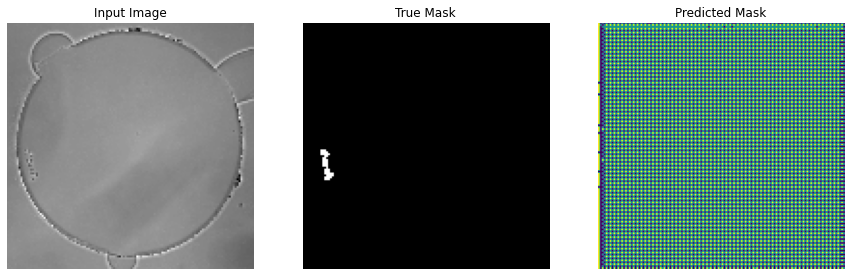


Sample Prediction after epoch 14

705/705 [==============================] - 4s 6ms/step - loss: 7.3788 - accuracy: 0.1249


In [125]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model_2 = unet_model(output_channels=OUTPUT_CLASSES)

# RMSprop compiler
tensorflow_model_2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 2
VAL_SUBSPLITS = 5

EPOCHS = 20
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH #// VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_2_history = tensorflow_model_2.fit(
                                                x_train,
                                                y_train_binary_masks, 
                                                epochs=EPOCHS,
                                                steps_per_epoch=STEPS_PER_EPOCH,
                                                callbacks=[DisplayCallback()],
                                                validation_steps=VALIDATION_STEPS,
                                                validation_data=(x_test, y_test_binary_masks)
                                                )




Nope... Okay, last push and then I have no choice but to try another technique:

1/1 [==============================] - 0s 33ms/step


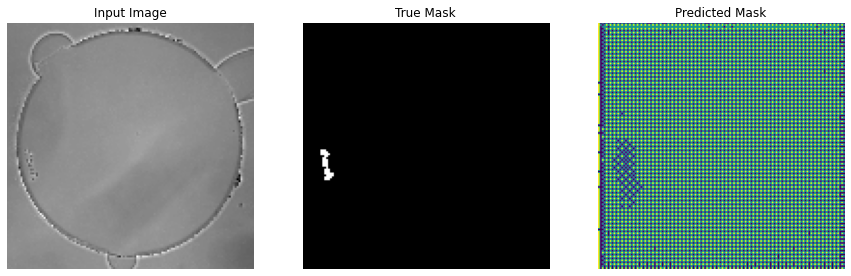


Sample Prediction after epoch 19

88/88 [==============================] - 4s 46ms/step - loss: 2.3093 - accuracy: 0.3418 - val_loss: 2.3967 - val_accuracy: 0.5560


In [126]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model_3 = unet_model(output_channels=OUTPUT_CLASSES)

# RMSprop compiler
tensorflow_model_3.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 16
VAL_SUBSPLITS = 5

EPOCHS = 20
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH // VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_3_history = tensorflow_model_3.fit(
                                                x_train,
                                                y_train_binary_masks, 
                                                epochs=EPOCHS,
                                                steps_per_epoch=STEPS_PER_EPOCH,
                                                callbacks=[DisplayCallback()],
                                                validation_steps=VALIDATION_STEPS,
                                                validation_data=(x_test, y_test_binary_masks)
                                                )




1/1 [==============================] - 0s 22ms/step


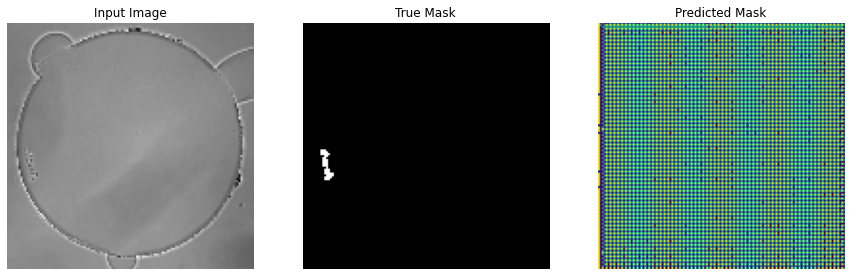


Sample Prediction after epoch 20

44/44 [==============================] - 2s 54ms/step - loss: 2.2187 - accuracy: 0.2536 - val_loss: 2.3968 - val_accuracy: 0.3993


In [127]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model_4 = unet_model(output_channels=OUTPUT_CLASSES)

# RMSprop compiler
tensorflow_model_4.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 32
VAL_SUBSPLITS = 5

EPOCHS = 20
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH // VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_4_history = tensorflow_model_4.fit(
                                                x_train,
                                                y_train_binary_masks, 
                                                epochs=EPOCHS,
                                                steps_per_epoch=STEPS_PER_EPOCH,
                                                callbacks=[DisplayCallback()],
                                                validation_steps=VALIDATION_STEPS,
                                                validation_data=(x_test, y_test_binary_masks)
                                                )




1/1 [==============================] - 0s 19ms/step


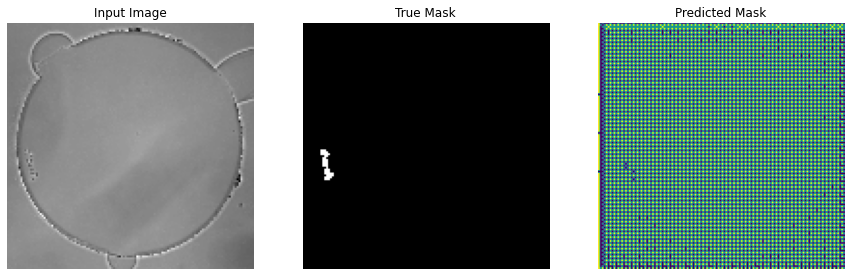


Sample Prediction after epoch 19

88/88 [==============================] - 3s 39ms/step - loss: 2.2674 - accuracy: 0.3423


In [128]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model_5 = unet_model(output_channels=OUTPUT_CLASSES)

# RMSprop compiler
tensorflow_model_5.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 16
VAL_SUBSPLITS = 1

EPOCHS = 20
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH // VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_5_history = tensorflow_model_5.fit(
                                                x_train,
                                                y_train_binary_masks, 
                                                epochs=EPOCHS,
                                                steps_per_epoch=STEPS_PER_EPOCH,
                                                callbacks=[DisplayCallback()],
                                                validation_steps=VALIDATION_STEPS,
                                                validation_data=(x_test, y_test_binary_masks)
                                                )




1/1 [==============================] - 0s 22ms/step


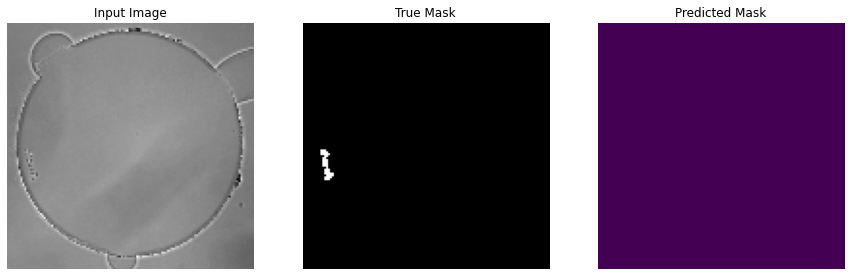


Sample Prediction after epoch 19

88/88 [==============================] - 3s 37ms/step - loss: nan - accuracy: 1.0000


In [132]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model_6 = unet_model(output_channels=OUTPUT_CLASSES)

# RMSprop compiler
tensorflow_model_6.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 16
VAL_SUBSPLITS = 1

EPOCHS = 20
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH // VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_6_history = tensorflow_model_6.fit(
                                                x_train,
                                                y_train_binary_masks, 
                                                epochs=EPOCHS,
                                                steps_per_epoch=STEPS_PER_EPOCH,
                                                callbacks=[DisplayCallback()],
                                                validation_steps=VALIDATION_STEPS,
                                                validation_data=(x_test, y_test_binary_masks)
                                                )




That Model above had a loss of NaN, out of nowhere... So perhaps the model is reusing weights?

1/1 [==============================] - 0s 20ms/step


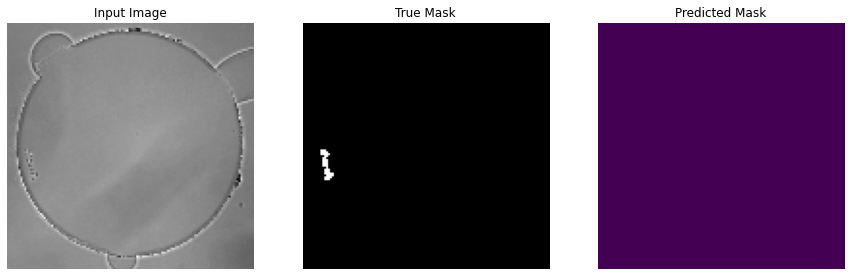


Sample Prediction after epoch 19

88/88 [==============================] - 2s 22ms/step - loss: nan - accuracy: 1.0000


In [135]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model_7 = unet_model(output_channels=OUTPUT_CLASSES)

# attempt to ensure layers not trainable
for layer in tensorflow_model_7.layers: layer.trainable = False; print("Occured")

# RMSprop compiler
tensorflow_model_7.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 16
VAL_SUBSPLITS = 1

EPOCHS = 20
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH // VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_7_history = tensorflow_model_7.fit(
                                                x_train,
                                                y_train_binary_masks, 
                                                epochs=EPOCHS,
                                                steps_per_epoch=STEPS_PER_EPOCH,
                                                callbacks=[DisplayCallback()],
                                                validation_steps=VALIDATION_STEPS,
                                                validation_data=(x_test, y_test_binary_masks)
                                                )







1/1 [==============================] - 0s 19ms/step


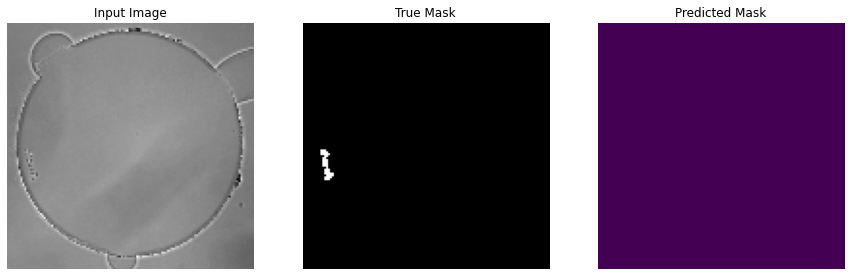


Sample Prediction after epoch 19

88/88 [==============================] - 2s 26ms/step - loss: nan - accuracy: 1.0000


In [136]:
OUTPUT_CLASSES = 3 # notice output classes
tensorflow_model_8 = unet_model(output_channels=OUTPUT_CLASSES)

# attempt to ensure layers not trainable
for layer in tensorflow_model_8.layers: layer.trainable = False; print("Occured")

# RMSprop compiler
tensorflow_model_8.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Below

TRAIN_LENGTH = len(x_train)
BATCH_SIZE = 16
VAL_SUBSPLITS = 1

EPOCHS = 20
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = STEPS_PER_EPOCH // VAL_SUBSPLITS

# used in DisplayCallbackGeneric
temp_model = tensorflow_model
tensorflow_model_8_history = tensorflow_model_8.fit(
                                                x_train,
                                                y_train_binary_masks, 
                                                epochs=EPOCHS,
                                                steps_per_epoch=STEPS_PER_EPOCH,
                                                callbacks=[DisplayCallback()],
                                                validation_steps=VALIDATION_STEPS,
                                                validation_data=(x_test, y_test_binary_masks)
                                                )







Okay, I have no choice now but to try a different implementation... I will try this in notebook 15